In [2]:
import pandas as pd
import re
import nltk as nltk
from collections import Counter
import Preprocessing as pre
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Helvetica']})


In [3]:
from itertools import islice

def take(n, iterable, dirc="first"):
    """Return the first or last n items of the dictionary as a list."""
    assert dirc == "first" or dirc == "last"
    if dirc == "first": 
        return list(islice(iterable, n))
    elif dirc == "last":
        return list(iterable.items())[-n:]

In [4]:
songs_data = pre.create_rap_df()
print(songs_data.head())

   position           title                               artist  year  \
0         1      God's Plan                                Drake  2018   
1         2       I Like It        Cardi B, Bad Bunny & J Balvin  2018   
2         3  In My Feelings                                Drake  2018   
3         4          Psycho  Post Malone Featuring Ty Dolla $ign  2018   
4         5   Nice For What                                Drake  2018   

                                              Lyrics  \
0  [And, they, wishin', and, wishin', And, wishin...   
1  [Yeah,, baby,, I, like, it, like, that, You, g...   
2  [Trap,, TrapMoneyBenny, This, shit, got, me, i...   
3  [Damn,, my, AP, goin', psycho,, lil', mama, ba...   
4  [I, wanna, know, who, mothafuckin', representi...   

                  Primary Artists  
0                         [Drake]  
1  [Cardi B, Bad Bunny, J Balvin]  
2                         [Drake]  
3                   [Post Malone]  
4                         [Drake]  


In [5]:
unfix_word_counts_by_artist = pre.create_word_count_dict_grouped(songs_data, artists=True)
# Fix key of dictionary
word_counts_by_artist = {}
for (artist,), word_dict in unfix_word_counts_by_artist.items():
    word_counts_by_artist[artist] = word_dict

total_words_by_artist = {}
unique_words_by_artist = {}
total_word_length_by_artist = {}

for artist, word_dict in word_counts_by_artist.items():
    total_words_by_artist[artist] = sum(word_dict.values())
    unique_words_by_artist[artist] = len(word_dict)

    for word, freq in word_dict.items():
        if artist in total_word_length_by_artist.keys():
            total_word_length_by_artist[artist] += len(word) * freq
        else:
            total_word_length_by_artist[artist] = len(word) * freq

average_word_length_by_artist = {}
for artist, tot_len in total_word_length_by_artist.items():
    average_word_length_by_artist[artist] = tot_len / total_words_by_artist[artist]

unique_ratio_by_artist = {}
for artist, tot_num in total_words_by_artist.items():
    unique_ratio_by_artist[artist] = unique_words_by_artist[artist] / tot_num

In [6]:
# Sort them all:
total_words_by_artist = dict(sorted(total_words_by_artist.items(), reverse=True, key=lambda item: item[1]))
unique_words_by_artist = dict(sorted(unique_words_by_artist.items(), reverse=True, key=lambda item: item[1]))
average_word_length_by_artist = dict(sorted(average_word_length_by_artist.items(), reverse=True, key=lambda item: item[1]))
unique_ratio_by_artist = dict(sorted(unique_ratio_by_artist.items(), reverse=True, key=lambda item: item[1]))

/var/folders/z7/9s3mm6sd3634bvl7wknm3t8h0000gn/T/ipykernel_6501/1828644559.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=[i[0] for i in first_n_avg_length], rotation=55, ha="right") # rotate labels 45 degrees and align to the right
/var/folders/z7/9s3mm6sd3634bvl7wknm3t8h0000gn/T/ipykernel_6501/1828644559.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=[i[0] for i in last_n_avg_length],rotation=55, ha="right") # rotate labels 45 degrees and align to the right


Text(0.5, 0.98, 'Average Word Length Of Top 7 And Lowest 7 Artists')

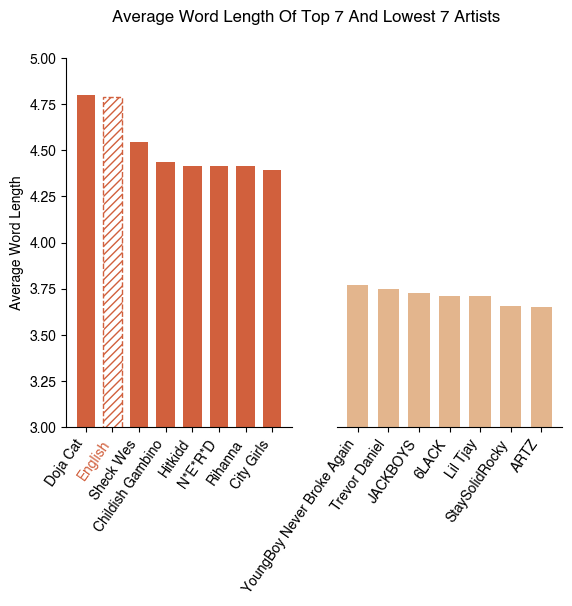

In [8]:
n = 7
AVG_LEN_EN = 4.79 # See: http://norvig.com/mayzner.html

first_n_avg_length = take(n, average_word_length_by_artist.items())
first_n_avg_length.append(("English", AVG_LEN_EN))
first_n_avg_length = sorted(first_n_avg_length, key=(lambda x: x[1]), reverse=True)
last_n_avg_length = take(n, average_word_length_by_artist, dirc="last")

bar_colors = ['#D1603D', '#E3B58D'] # orange-brown colors
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

bars1 = ax1.bar([i[0] for i in first_n_avg_length], [i[1] for i in first_n_avg_length], color=bar_colors[0], width=0.7)
english_bar = bars1[[i[0] for i in first_n_avg_length].index('English')]
english_bar.set_fill(False)
english_bar.set_color('#D1603D')
english_bar.set_linestyle('dashed')
english_bar.set_hatch('////')
english_label = ax1.get_xticklabels()[[i[0] for i in first_n_avg_length].index('English')]
english_label.set_color('#D1603D')

ax2.bar([i[0] for i in last_n_avg_length], [i[1] for i in last_n_avg_length], color=bar_colors[1], width=0.7)
ax1.set_xticklabels(labels=[i[0] for i in first_n_avg_length], rotation=55, ha="right") # rotate labels 45 degrees and align to the right
ax2.set_xticklabels(labels=[i[0] for i in last_n_avg_length],rotation=55, ha="right") # rotate labels 45 degrees and align to the right

plt.ylim([3, 5]) # set the upper y-limit slightly above the highest value

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='y', which='both', length=0)

ax1.set_ylabel("Average Word Length")
plt.suptitle("Average Word Length Of Top 7 And Lowest 7 Artists")


/var/folders/z7/9s3mm6sd3634bvl7wknm3t8h0000gn/T/ipykernel_6501/1729166255.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=[i[0] for i in first_n_unique], rotation=45, ha="right") # rotate labels 45 degrees and align to the right
/var/folders/z7/9s3mm6sd3634bvl7wknm3t8h0000gn/T/ipykernel_6501/1729166255.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=[i[0] for i in last_n_unique],rotation=45, ha="right") # rotate labels 45 degrees and align to the right


Text(0.5, 0.98, 'Unique Word Ratio Of Top 7 And Lowest 7 Artists')

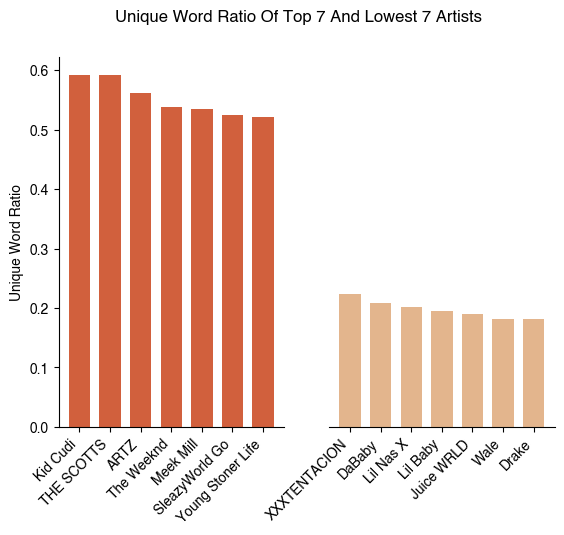

In [9]:
n = 7
first_n_unique = take(n, unique_ratio_by_artist.items())
last_n_unique = take(n, unique_ratio_by_artist, dirc="last")

bar_colors = ['#D1603D','#E3B58D'] # orange-brown colors
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.bar([i[0] for i in first_n_unique], [i[1] for i in first_n_unique], color=bar_colors[0], width=0.7)
ax2.bar([i[0] for i in last_n_unique], [i[1] for i in last_n_unique], color=bar_colors[1], width=0.7)
ax1.set_xticklabels(labels=[i[0] for i in first_n_unique], rotation=45, ha="right") # rotate labels 45 degrees and align to the right
ax2.set_xticklabels(labels=[i[0] for i in last_n_unique],rotation=45, ha="right") # rotate labels 45 degrees and align to the right

# plt.ylim([0,0.7]) # set the upper y-limit slightly above the highest value

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='y', which='both', length=0)

ax1.set_ylabel("Unique Word Ratio")
plt.suptitle("Unique Word Ratio Of Top 7 And Lowest 7 Artists")

